# Loading Test Images

In [3]:
# Loading Test Image


# Importing used Librarys
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

#from moviepy.editor import VideoFileClip

In [4]:
def list_images(images,cols=2,row=5,cmap=None):
    plt.figure(figsize=(10,11))
    for i, image in enumerate(images):
        plt.subplot(row,cols,i+1)

        cmap = 'grey' if len(image.shape) == 2 else cmap
        plt.imshow(image,cmap = cmap)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout(pad=0,h_pad=0,w_pad=0)
    plt.show()

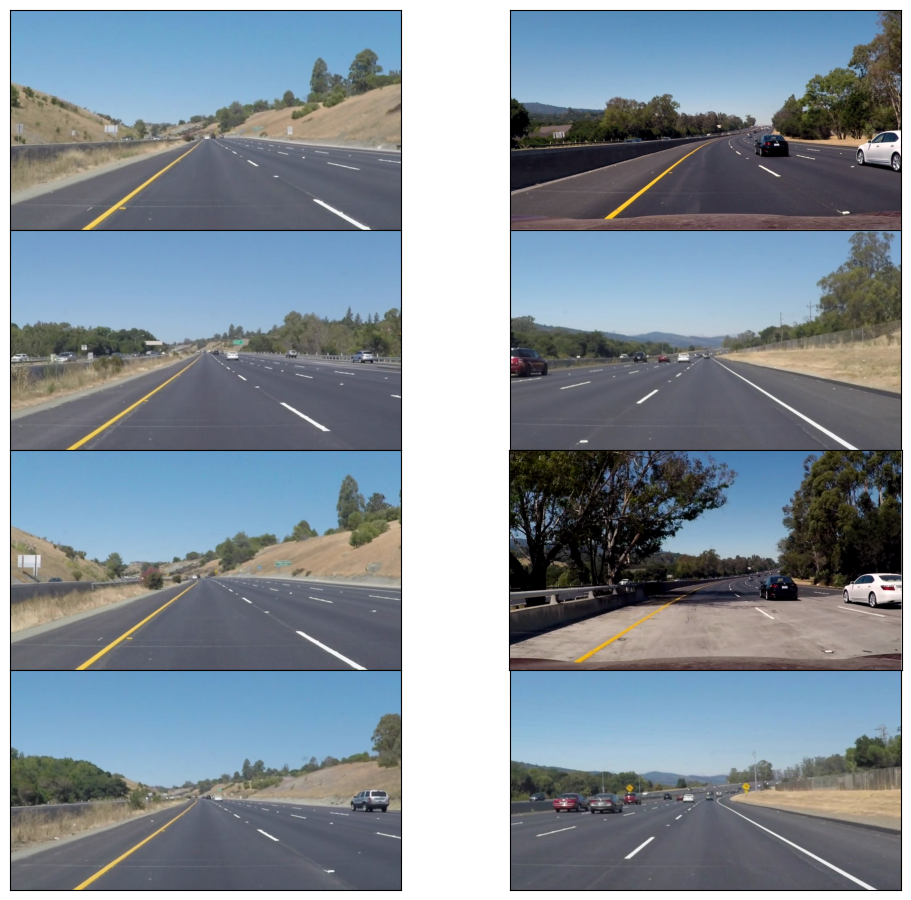

In [5]:
test_images = [plt.imread(img) for img in glob.glob('test_images/*.jpg')]
list_images(test_images)

# Color Selection


Lane lines in the test images are in white and yellow. We need to choose the most suitable color space, that clearly highlights the lane lines

### Original RGB COLOR SELECTION

In [6]:
def RGB_COLOR_SELECTION(image):
    # The simplest thresholding methods replace each pixel in an image with a black pixel if the image intensity is less than a fixed value called the threshold
    
    
    # White mask
    lower_threshold = np.uint8([200,200,200])
    upper_thershold = np.uint8([255,255,255])
    white_mask = cv2.inRange(image,lower_threshold,upper_thershold)

    # Yellow mask
    lower_threshold = np.uint8([175,175,0])
    upper_thershold = np.uint8([255,255,255])
    yellow_mask = cv2.inRange(image,lower_threshold,upper_thershold)

    # Both White and Yellow
    mask = cv2.bitwise_or(white_mask,yellow_mask)
    masked_image = cv2.bitwise_and(image,image,mask=mask)

    return masked_image

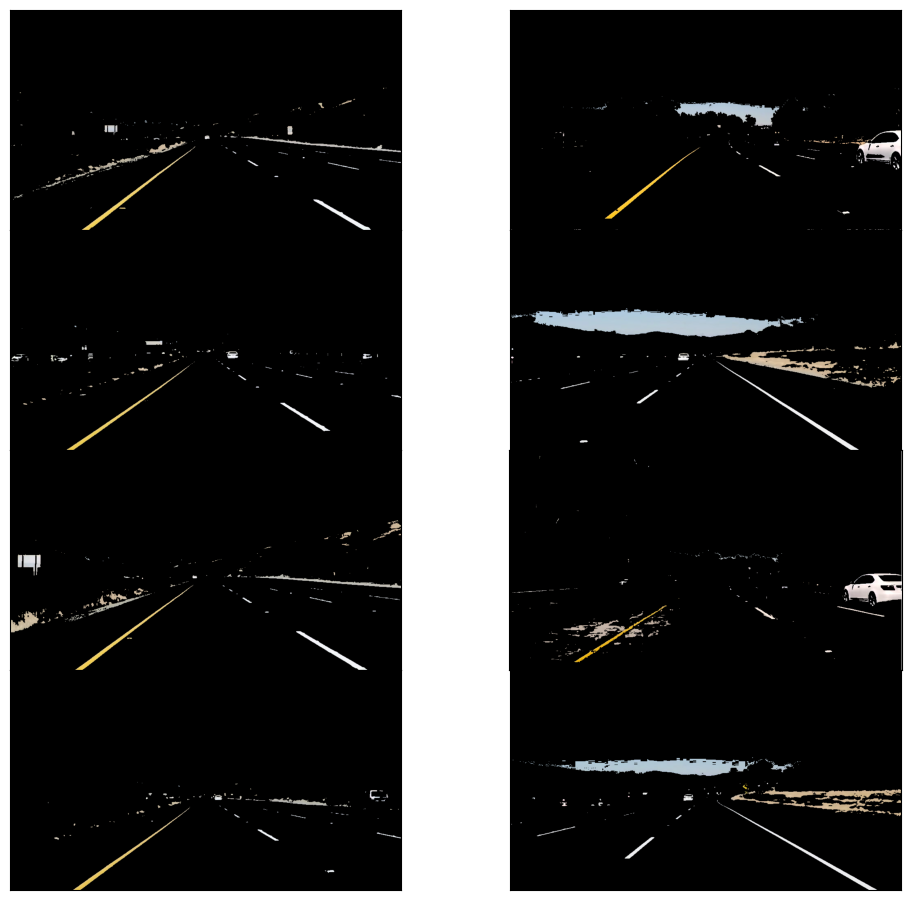

In [7]:
list_images(list(map(RGB_COLOR_SELECTION,test_images)))

### HSV color space

HSV is an alternative representation of the RGB color model. The HSV representation models the way colors mix together, with the saturation dimension resembling various shades of brightly colored paint, and the value dimension resembling the mixture of those paints with varying amounts of black or white.

We are picking whight,Yellow from the HSV image,for that we have first convert the main image to HSV 

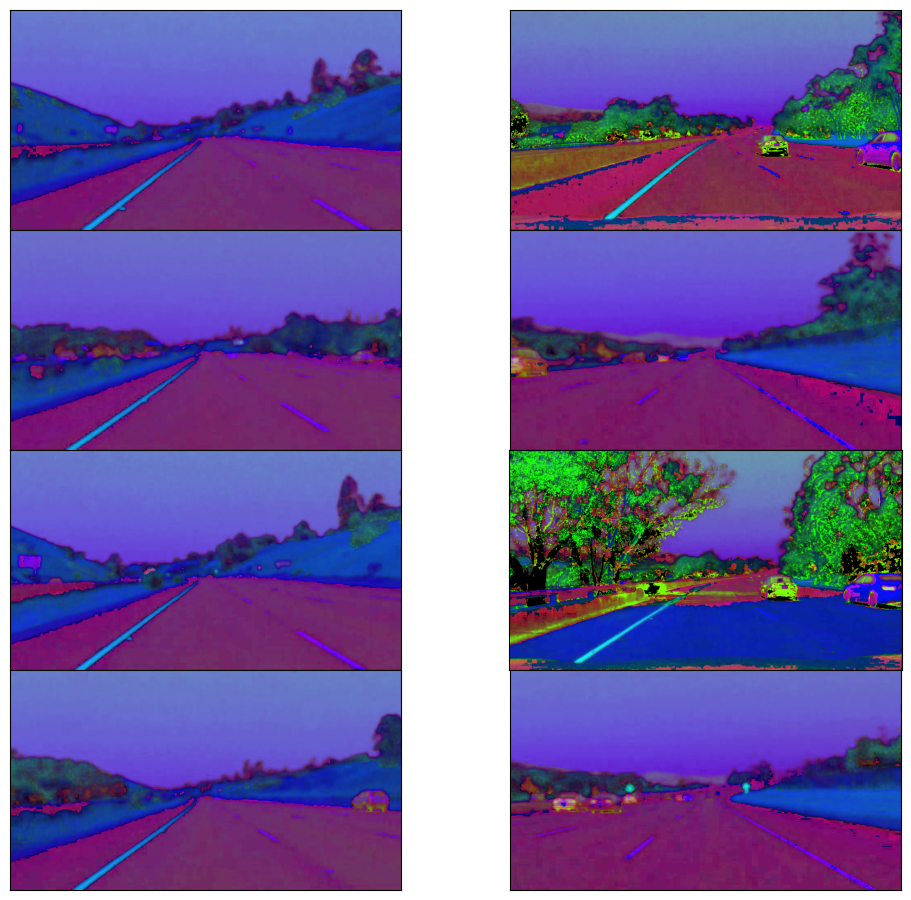

In [8]:
# First we are converting the main images to HSV image

def convert_to_hsv(image):
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

list_images(list(map(convert_to_hsv, test_images)))

In [9]:
def HSV_color_selection(image):
    
    #Convert the input image to HSV
    converted_image = convert_to_hsv(image)
    
    #White color mask
    lower_threshold = np.uint8([0, 0, 210])
    upper_threshold = np.uint8([255, 30, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([18, 80, 80])
    upper_threshold = np.uint8([30, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

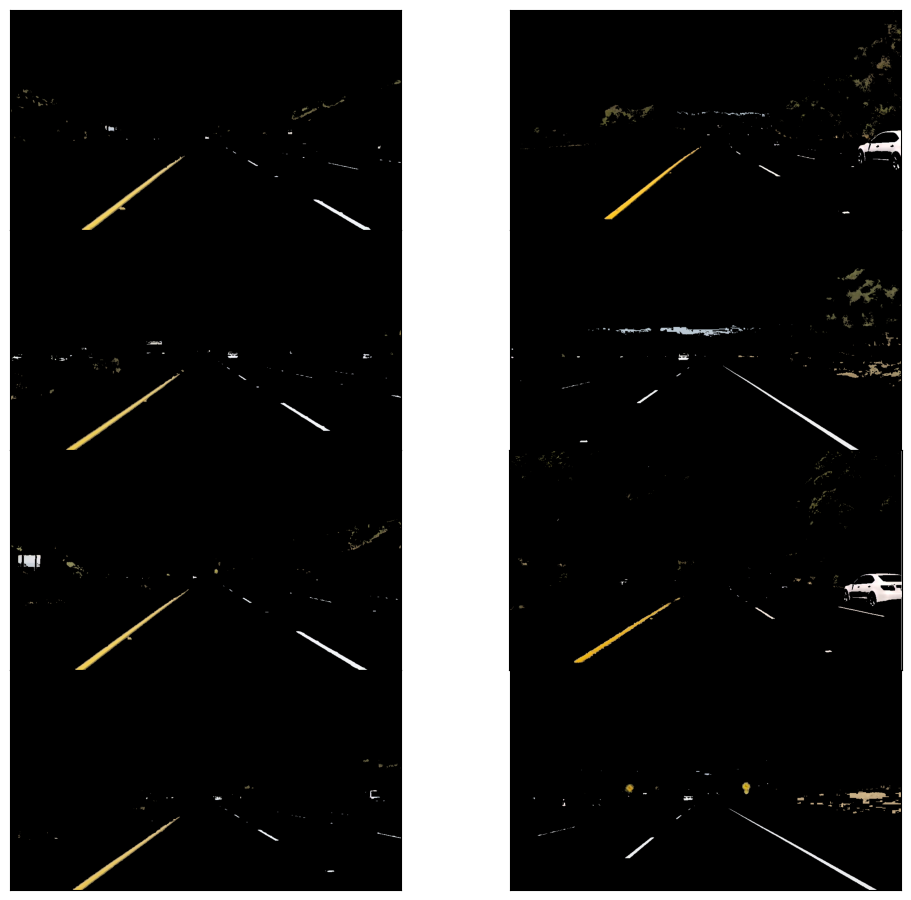

In [10]:
list_images(list(map(HSV_color_selection, test_images)))

### HSL COLOR SPACE

HSL is an alternative representation of the RGB color model. The HSL model attempts to resemble more perceptual color models such as NCS or Munsell, placing fully saturated colors around a circle at a lightness value of 1/2, where a lightness value of 0 or 1 is fully black or white, respectively.

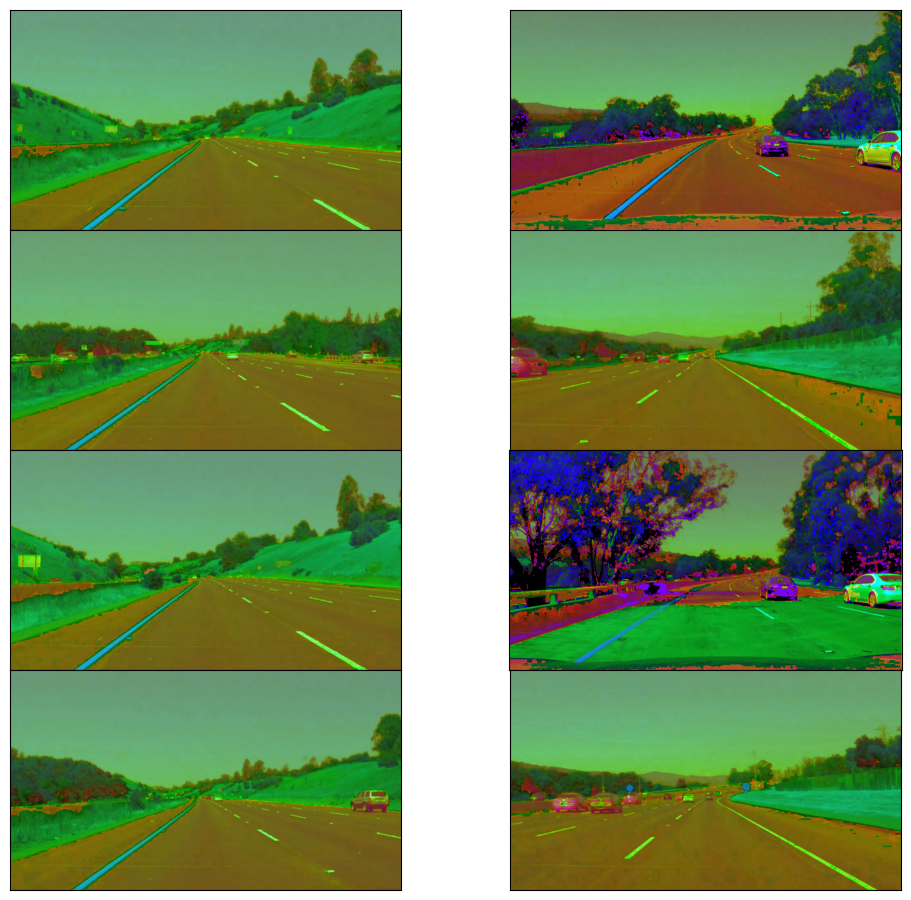

In [11]:
# First we are converting the main images to HSL image

def convert_hsl(image):
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

list_images(list(map(convert_hsl, test_images)))

In [12]:
def HSL_color_selection(image):
    
    #Convert the input image to HSL
    converted_image = convert_hsl(image)
    
    #White color mask
    lower_threshold = np.uint8([0, 200, 0])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([10, 0, 100])
    upper_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

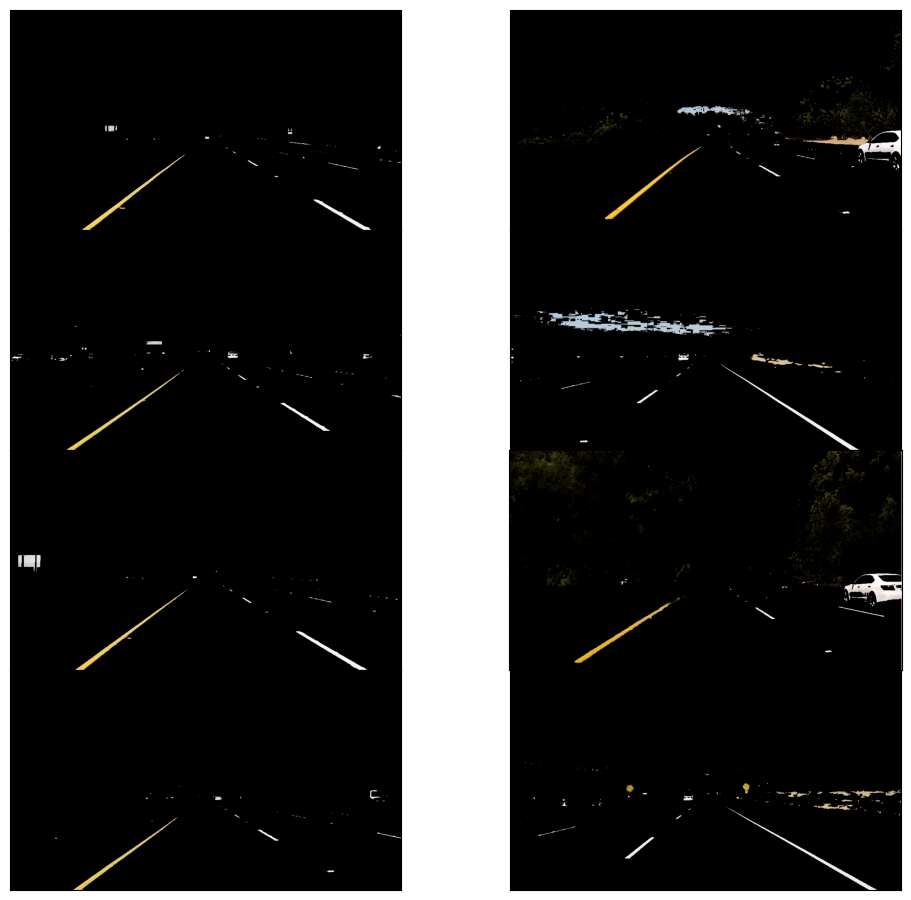

In [13]:
list_images(list(map(HSL_color_selection, test_images)))

In [14]:

color_selected_images = list(map(HSL_color_selection, test_images))

# Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

### Grey Scaling the Image

This function convert the image to gyay in order to detct the edges

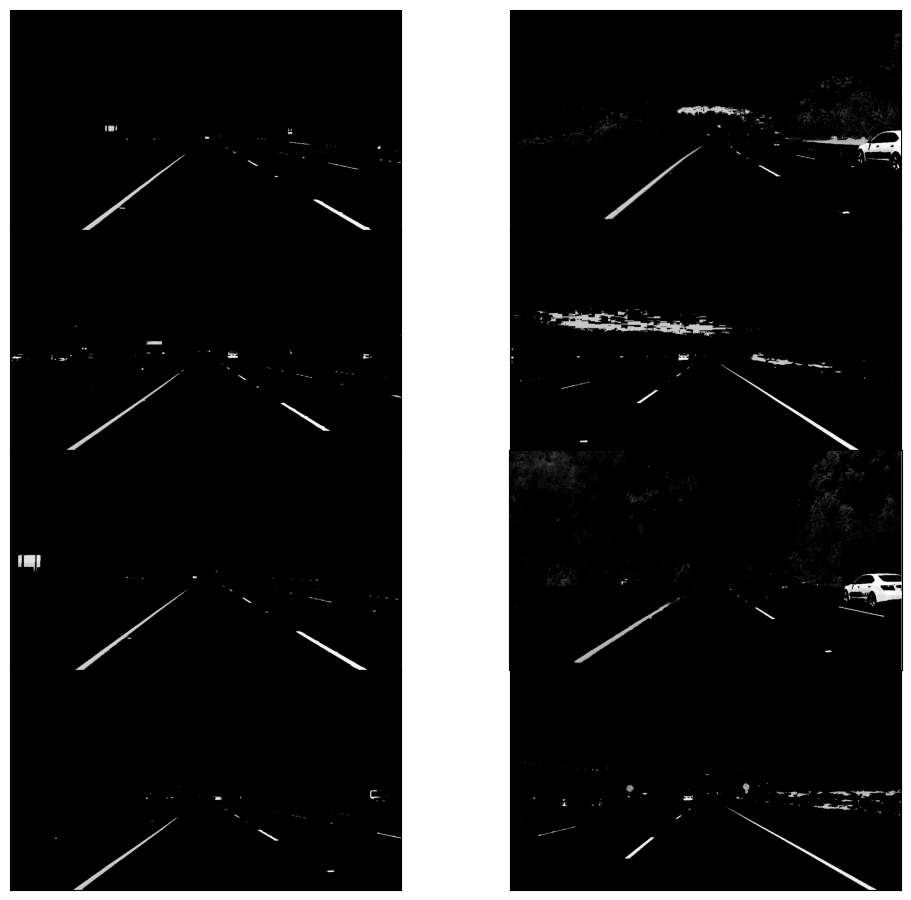

In [16]:
def gray_scale(image):
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images = list(map(gray_scale, color_selected_images))
list_images(gray_images)

### Applying Gaussian Smoothing

To filter out the noise to prevent false detection caused by noise. To smooth the image, a Gaussian filter is applied to convolve with the image. This step will slightly smooth the image to reduce the effects of obvious noise on the edge detector.



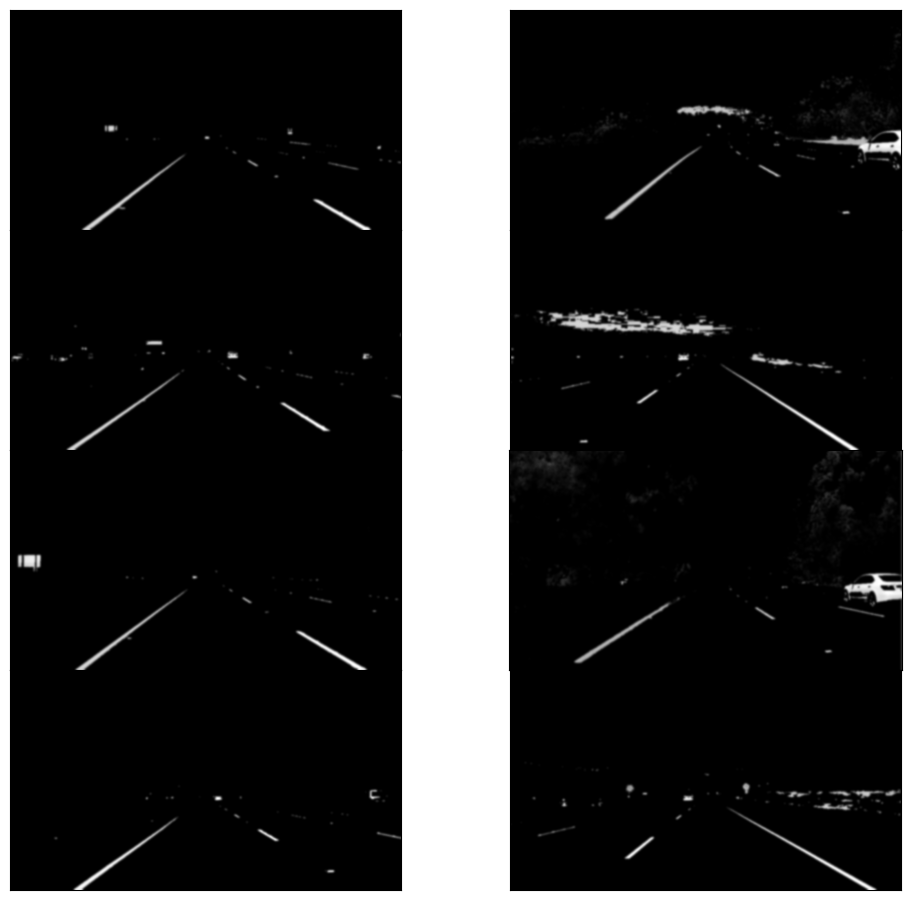

In [17]:
def gaussian_smoothing(image, kernel_size = 13):
    
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
blur_images = list(map(gaussian_smoothing, gray_images))
list_images(blur_images)

### Applying Canny Edge Detection

Process Of Canny Edge Detection

1. Find the intensity gradients of the image. 
2. Apply non-maximum suppression to get rid of spurious response to edge detection.
3. Apply double threshold to determine potential edges.
4. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's value is smaller than the low threshold value, it will be suppressed. The two threshold values are empirically determined and their definition will depend on the content of a given input image

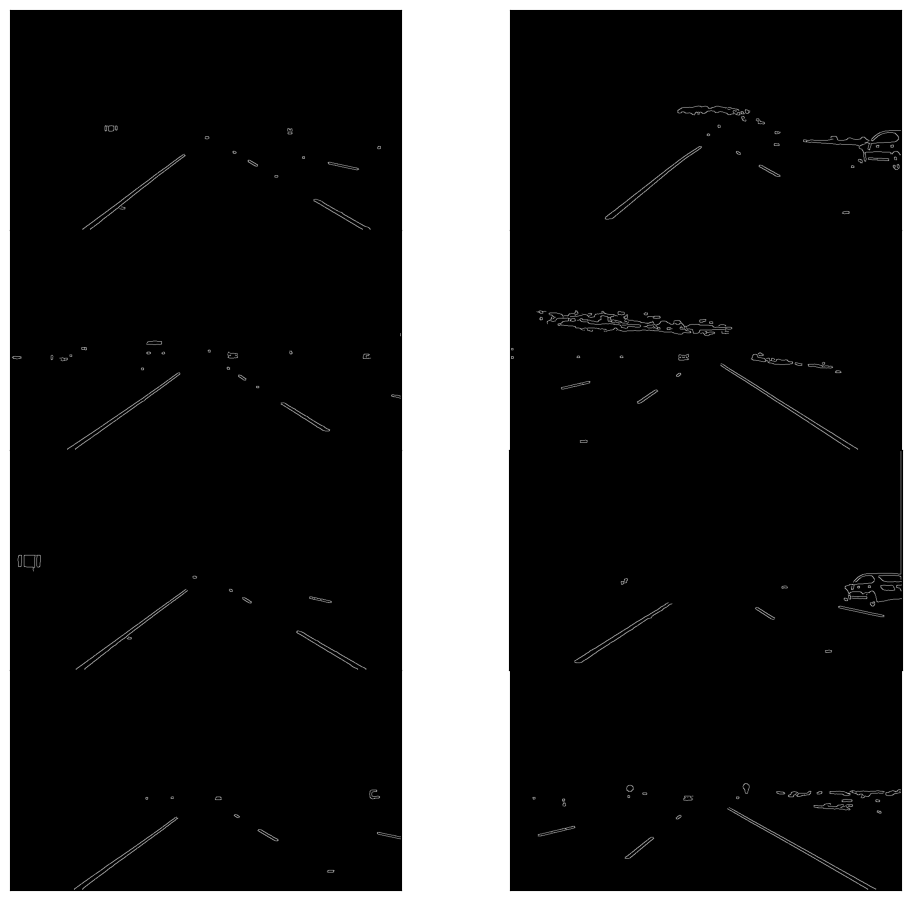

In [18]:
def canny_detector(image, low_threshold = 50, high_threshold = 150):
   
    return cv2.Canny(image, low_threshold, high_threshold)
edge_detected_images = list(map(canny_detector, blur_images))
list_images(edge_detected_images)